In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('sat_image_plaksha1.jpg')

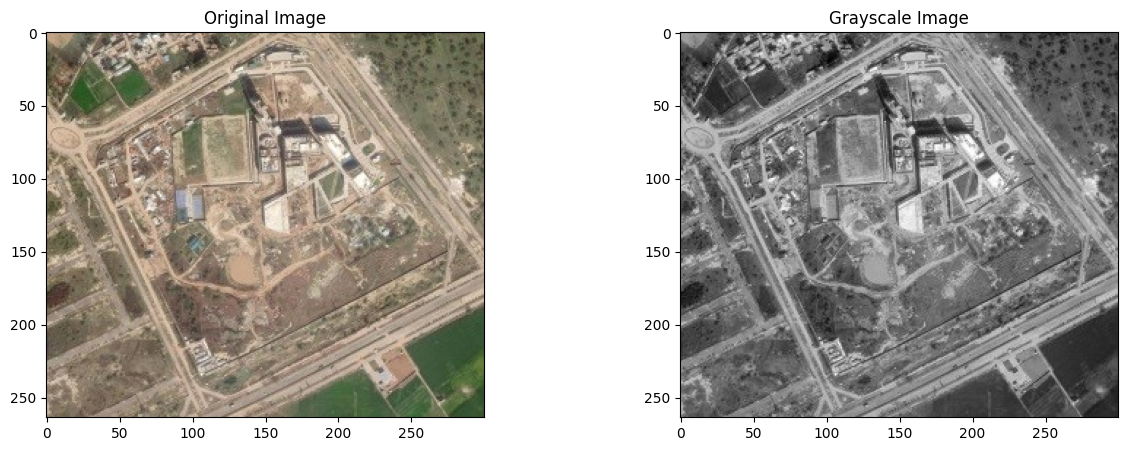

In [3]:

grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayscale_image = grayscale_image.astype(np.float64)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the original image
axes[0].set_title('Original Image')
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Plot the grayscale image
axes[1].set_title('Grayscale Image')
axes[1].imshow(grayscale_image, cmap='gray')

plt.show()

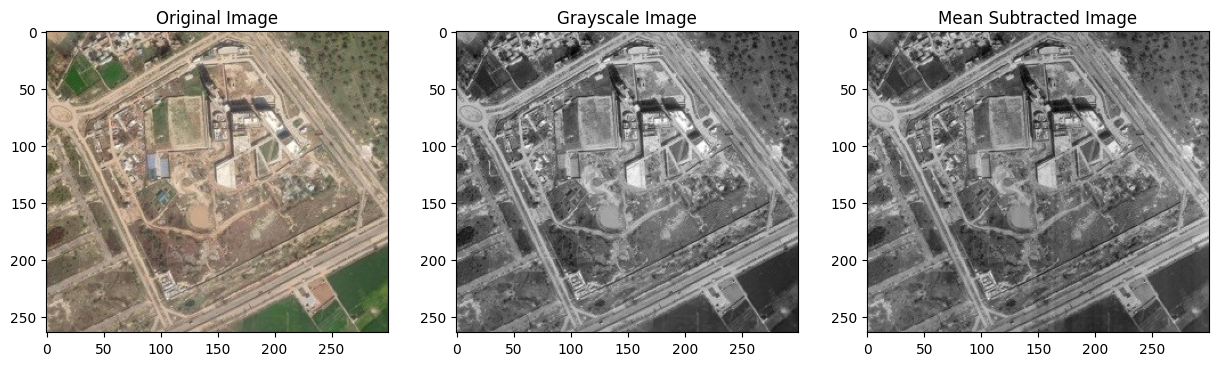

In [4]:
mean_column = np.mean(grayscale_image, axis=0)
image_mean_subtracted = grayscale_image - mean_column

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the original image
axes[0].set_title('Original Image')
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Plot the grayscale image
axes[1].set_title('Grayscale Image')
axes[1].imshow(grayscale_image, cmap='gray')

# Plot the Mean Subtracted Image
axes[2].set_title('Mean Subtracted Image')
axes[2].imshow(image_mean_subtracted, cmap='gray')

plt.show()

In [5]:
covariance_matrix = np.cov(image_mean_subtracted, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [6]:
num_components_to_keep = [10, 20, 30, 40, 50, 60, 91, 300]

output_images = []
for num in num_components_to_keep:
    selected_components = eigenvectors[:, :num]
    projected_data = np.dot(selected_components.T, image_mean_subtracted.T).T
    reconstructed_image = np.dot(selected_components, projected_data.T).T + mean_column
    reconstructed_image = reconstructed_image.astype(np.uint8)
    output_images.append(reconstructed_image)

<ipython-input-6-f796e3926a3e>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image = reconstructed_image.astype(np.uint8)


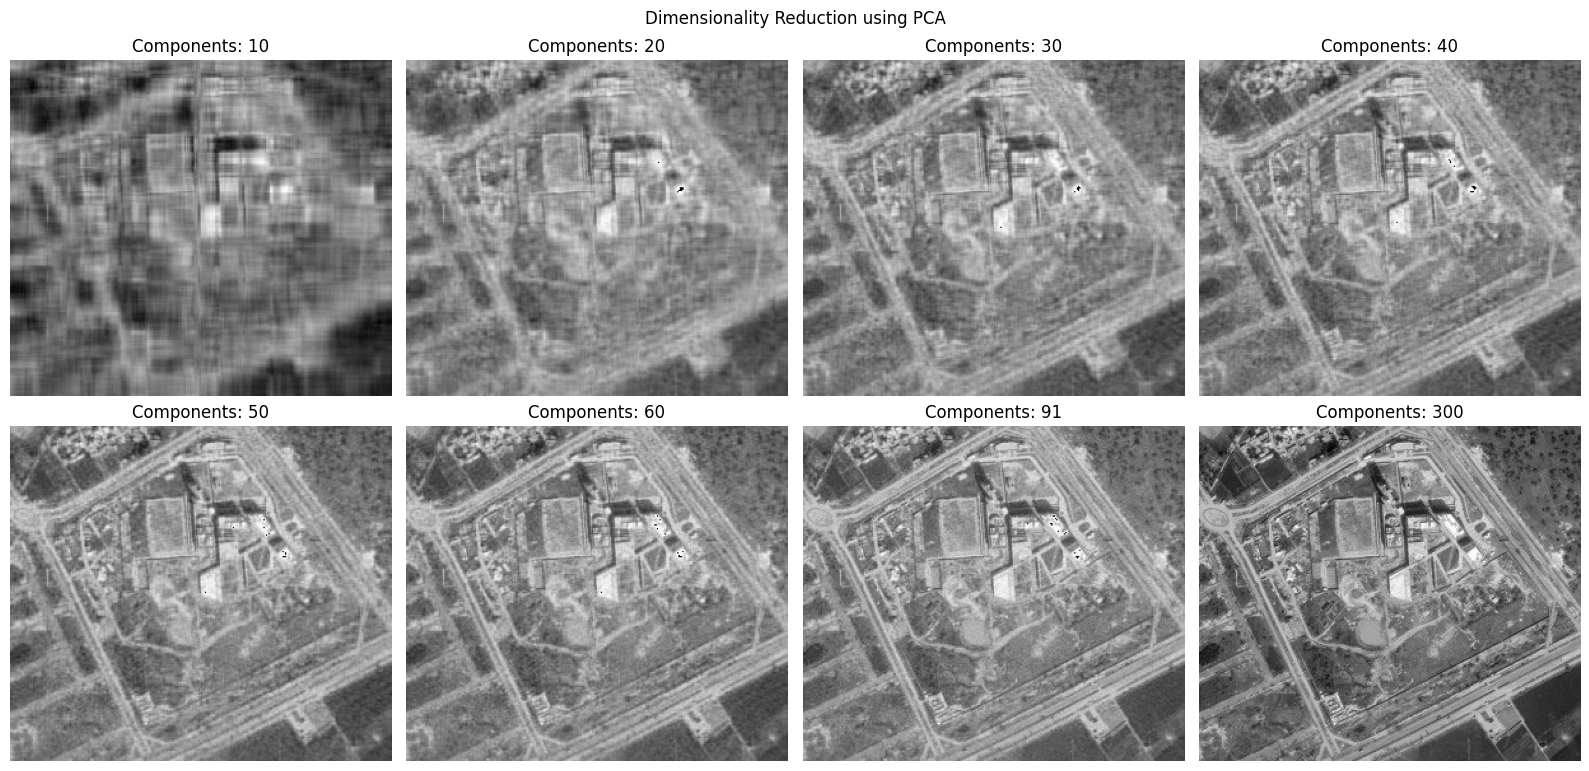

In [7]:
num_plots = len(num_components_to_keep)
num_rows = 2
num_columns = (num_plots + 1) // num_rows  # Calculate the number of columns

plt.figure(figsize=(16, 8))
plt.suptitle('Dimensionality Reduction using PCA')

for i in range(num_plots):
    plt.subplot(num_rows, num_columns, i + 1)
    plt.title(f'Components: {num_components_to_keep[i]}')
    plt.imshow(output_images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=91)
pca.fit(image_mean_subtracted)
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
num_components_for_95_percent_variance = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1
print(f"Number of components required to explain 95% of the variance: {num_components_for_95_percent_variance}")


Number of components required to explain 95% of the variance: 91
